In [15]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from Engine import *
from util import *


In [17]:
default_opts['train_opts']['tolerance'] = 1e-3
default_opts['nn_opts']['p'] = 2
eng = Engine(default_opts)

In [18]:
eng.setup_data()

In [19]:
eng.opts["traintype"] = "init"
eng.solve()

{
  "Dexact": 2.0,
  "model_dir": "model",
  "nn_opts": {
    "basic": false,
    "depth": 3,
    "init_D": 1.0,
    "p": 2,
    "use_resnet": false,
    "width": 64
  },
  "noise_opts": {
    "length_scale": 0.0,
    "use_noise": false,
    "variance": 0.01
  },
  "train_opts": {
    "lr": 0.001,
    "max_iter": 100000,
    "print_every": 100,
    "tolerance": 0.001
  },
  "traintype": "init"
}
Epoch 0, PDE Loss: 741, Data Loss: 0.48 Total Loss: 892 D loss: 150 D: 1
Epoch 100, PDE Loss: 711, Data Loss: 0.456 Total Loss: 712 D loss: 0.0019 D: 1
Epoch 200, PDE Loss: 616, Data Loss: 0.396 Total Loss: 616 D loss: 0.000179 D: 1
Epoch 300, PDE Loss: 364, Data Loss: 0.236 Total Loss: 364 D loss: 0.00937 D: 1
Epoch 400, PDE Loss: 110, Data Loss: 0.0422 Total Loss: 110 D loss: 0.00812 D: 1
Epoch 500, PDE Loss: 68.5, Data Loss: 0.00314 Total Loss: 68.5 D loss: 0.000701 D: 1
Epoch 600, PDE Loss: 54, Data Loss: 0.001 Total Loss: 54 D loss: 0.000162 D: 1
Epoch 700, PDE Loss: 43.6, Data Loss: 0.000

In [21]:
torch.save({
            'model_state_dict': eng.net.state_dict(),
            }, 'checkpoint-p2.pth')

Using device: cuda


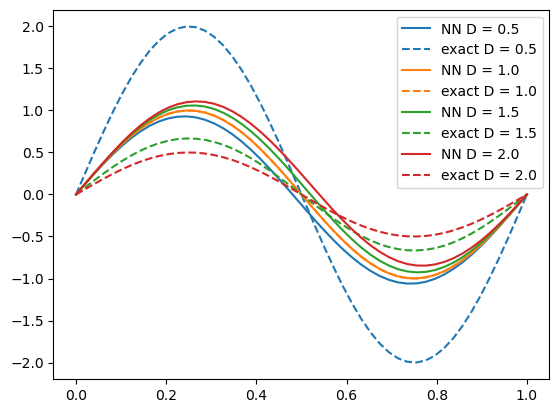

In [22]:
import matplotlib.pyplot as plt

# Evaluate the trained neural network on a new grid
x_test = torch.linspace(0, 1, 50).view(-1, 1).to(device)

c = plt.rcParams['axes.prop_cycle'].by_key()['color']

u_test = eng.net(x_test)
u_init_test = eng.net.u_init(x_test)


# plot diffeernt D value
Ds = [0.5, 1.0, 1.5, 2.0]
fig, ax = plt.subplots()

for i in range(len(Ds)):
    D = Ds[i]
    with torch.no_grad():
        eng.net.D.data = torch.tensor([D]).to(device)
    u_test = eng.net(x_test)
    ax.plot(x_test.cpu().numpy(), u_test.cpu().detach().numpy(), label='NN D = {}'.format(D),color=c[i])

    u_exact_test = eng.net.u_exact(x_test, D)
    ax.plot(x_test.cpu().numpy(), u_exact_test.cpu().numpy(), label='exact D = {}'.format(D),color=c[i],linestyle='--')
# set net.D
ax.legend(loc="upper right")


# reset D to initial value
eng.net.D.data = torch.tensor([eng.net.init_D]).to(device)

In [23]:
eng.opts["traintype"] = "inverse"
eng.solve()

{
  "Dexact": 2.0,
  "model_dir": "model",
  "nn_opts": {
    "basic": false,
    "depth": 3,
    "init_D": 1.0,
    "p": 2,
    "use_resnet": false,
    "width": 64
  },
  "noise_opts": {
    "length_scale": 0.0,
    "use_noise": false,
    "variance": 0.01
  },
  "train_opts": {
    "lr": 0.001,
    "max_iter": 100000,
    "print_every": 100,
    "tolerance": 0.001
  },
  "traintype": "inverse"
}
Epoch 0, PDE: 0.000969, Data: 0.119, Dloss: 0.00117, Total: 0.121, D: 1
Epoch 100, PDE: 0.00208, Data: 0.117, Dloss: 0.00363, Total: 0.123, D: 1
Epoch 200, PDE: 0.00078, Data: 0.117, Dloss: 4.57e-09, Total: 0.117, D: 1
Epoch 300, PDE: 0.000717, Data: 0.116, Dloss: 9.5e-08, Total: 0.117, D: 1.01
Epoch 400, PDE: 0.000729, Data: 0.115, Dloss: 1.26e-07, Total: 0.116, D: 1.01
Epoch 500, PDE: 0.00127, Data: 0.113, Dloss: 6.05e-08, Total: 0.114, D: 1.01
Epoch 600, PDE: 0.00469, Data: 0.107, Dloss: 2.37e-07, Total: 0.112, D: 1.03
Epoch 700, PDE: 0.0192, Data: 0.0939, Dloss: 2.05e-07, Total: 0.113, D